Lagrange function is 2*lambda*x - 6*lambda + 2*x
x* =  3*lambda/(lambda + 1)
hess of L(x,l) =  2*lambda + 2 which is always positive
dual(l)  9*lambda**2/(lambda + 1)**2 + lambda*(3*lambda/(lambda + 1) - 4)*(3*lambda/(lambda + 1) - 2) + 1
lambda* =  [-4, 2]  only positive is suitable: 2
Since hess of dual func is  -18/(lambda**3 + 3*lambda**2 + 3*lambda + 1)  is always negative
Thus, dual function is concave


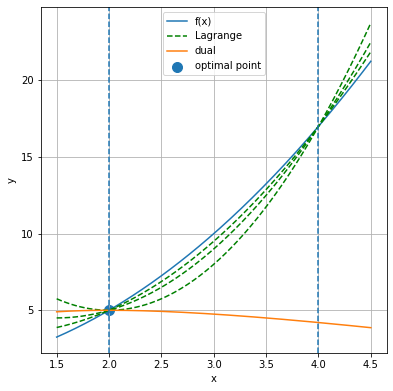

In [84]:
from sympy import Function, hessian, pprint, Matrix, simplify
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

def printPlot():
    fig = plt.figure(figsize=(6,6))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 

    start, stop, n_values = 1.5,4.5, 200
    x_vals = np.linspace(start, stop, n_values)
    y = f(x_vals)
    hy = h(x_vals)
    Ly = L(x_vals,2)
    dy = d(x_vals)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals,y, label='f(x)' )
    plt.plot(x_vals,L(x_vals,0.5), linestyle='dashed', color = 'green', label = 'Lagrange')
    plt.plot(x_vals,L(x_vals,1.0), linestyle='dashed', color = 'green')
    plt.plot(x_vals,L(x_vals,2.0), linestyle='dashed', color = 'green')
    plt.plot(x_vals,dy, label='dual')
    plt.scatter(2, 5, s=100, label='optimal point')
    plt.axvline(x = 2, linestyle='dashed')
    plt.axvline(x = 4, linestyle='dashed')
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
x, l1 = sym.symbols('x lambda')
fx = x*x + 1
hx = (x-2)*(x-4)
Lx = fx+ l1* hx

L_dx = simplify(sym.diff(Lx,x))
sol1 = sym.solve(L_dx, x)
# print(sol1)
L_dx2 = simplify(sym.diff(L_dx,x))
print("Lagrange function is",  L_dx )
print("x* = ", sol1[0])
print("hess of L(x,l) = ", L_dx2, "which is always positive")
dual = Lx.subs(x, sol1[0])
dual_dl = simplify(sym.diff(dual,l1))
sol2 = sym.solve(dual_dl, l1)
print("dual(l) ", dual)
print("lambda* = ", sol2, " only positive is suitable:" , sol2[1])
print ("Since hess of dual func is ", simplify(sym.diff(dual_dl,l1)), " is always negative")
print ("Thus, dual function is concave") 
f = sym.lambdify(x, fx, "numpy") 
h = sym.lambdify(x, hx, "numpy")
L = sym.lambdify([x,l1] ,Lx, "numpy")
d = sym.lambdify([l1] ,dual, "numpy")

printPlot()